# STOCK PRICE PREDICTICTION: USING ARIMA/SARIMAX MODELS

## Hypotheses:

- Based on personal usage history, fridays seem to be good days to buy, and Mondays good days to sell
    - Test volume (group by day-of-week and get mean) of trades between these two days
    - Check volumes (group by day-of-week and get mean) for other days to see any other trends

- During a given week or month, low and highs are consistent and can be predicted. These are the days when purchases and sales can be made to maximize profit

- Holidays impact trading volumes - trading slows down during holidays (Thanksgiving to New Years) and ramps back up after holidays i.e. 2nd week of Jan. Hence, similar to #1 we can draw below hypotheses
    - During Holidays - traders will try to cash out. Hence, higher volumes = lower stock prices
    - Post Holidays - traders gradually start buying. Hence, slightly higher vol = higher stock prices
    
- Amazon Prime day and Black Friday impact trading
- During summer vacations, trading is low
- There is a cycle for stock market crash, so there should be a way to predict next crash
    - Time of day: Stocks trade higher in the AM vs PM. Hence, sell in AM and buy ??? late PM? - Need to predict

## Goal: Accurately predict day, week or month for trading to maximize profit


12/04/18:
Use this link to build time series model:
https://trainings.analyticsvidhya.com/courses/course-v1:AnalyticsVidhya+TS_101+TS_term1/courseware/a869013c2e274d1c82cd2fc50e64fb2d/e1ca0a12a88943c3a60c6d699b965a97/?child=first

In [44]:
# Setup - set variables and import libraries

# Import all necessary libraries
import fix_yahoo_finance as yf  
import numpy as np # For mathematical calculations
import pandas as pd
from scipy.stats.stats import pearsonr
from scipy import stats
import pprint
import requests
from datetime import datetime    # To access datetime
from sklearn.model_selection import TimeSeriesSplit
%matplotlib inline
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

#import statistics as st
#import matplotlib
#import quandl
#API_KEY = 'caSsMS95EZAzdK77dMsj' # Store API key as string - according to PEP8, constants always upper case

# set variables
start_dt = '2014-05-01'
end_dt = '2018-12-31'
stock1 = 'ESV'
stock2 = 'SRAX'

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


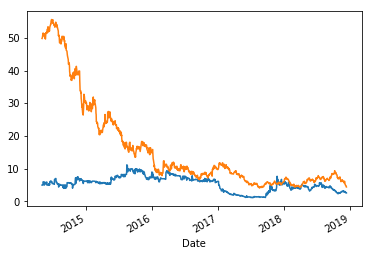

In [45]:
# Download Option1: Yahoo Finance
# Need to install fix_yahoo_finance using command <pip install fix_yahoo_finance> on terminal
y_esv = yf.download(stock1,start_dt, end_dt)
y_srax = yf.download(stock2,start_dt, end_dt)
y_srax.Close.plot()
y_esv.Close.plot()
plt.show()

In [46]:
y_esv.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-05-01,50.270000,50.369999,49.750000,49.820000,45.041172,2726900
2014-05-02,49.930000,50.330002,49.820000,49.930000,45.140617,2226700
2014-05-05,49.869999,50.799999,49.750000,50.750000,45.881966,3078600
2014-05-06,50.770000,51.250000,50.360001,51.150002,46.243595,2093000
2014-05-07,51.259998,51.529999,50.689999,51.500000,46.560017,1794100


In [47]:
# Get max open, high, low and close for the selecte period
mao=round(max(y_esv.Open),2)
mah=round(y_esv.High.max(),2) # alternate method to get max
mal=round(max(y_esv.Low),2)
mac=round(max(y_esv.Close),2)

In [48]:
# Get min open, high, low and close for the selecte period
mio=round(y_esv.Open.min(),2)
mih=round(min(y_esv.High),2)
mil=round(min(y_esv.Low),2)
mic=round(min(y_esv.Close),2)

In [49]:
print('Maxs - ','Open:',mao,' High:',mah, ' Low:',mal, ' Close:',mac)
print('Mins - ','Open:',mio,' High:',mih, ' Low:',mil, ' Close:',mic)

Maxs -  Open: 55.55  High: 55.89  Low: 55.1  Close: 55.62
Mins -  Open: 4.15  High: 4.28  Low: 4.1  Close: 4.16


In [50]:
# Check the result with built in function as cross-validation - passed
esv_med = y_esv.Open.median()
esv_mean = y_esv.Open.mean()
srax_med = y_srax.Open.median()
srax_mean = y_srax.Open.mean()
print("ESV Median:",esv_med, " ESV Mean:",esv_mean, " | ","SRAX Median:",srax_med, " SRAX Mean:",srax_mean)

ESV Median: 9.7  ESV Mean: 16.022042927038626  |  SRAX Median: 5.5  SRAX Mean: 5.327888412017173


In [51]:
y_esv.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1165 entries, 2014-05-01 to 2018-12-13
Data columns (total 6 columns):
Open         1165 non-null float64
High         1165 non-null float64
Low          1165 non-null float64
Close        1165 non-null float64
Adj Close    1165 non-null float64
Volume       1165 non-null int64
dtypes: float64(5), int64(1)
memory usage: 63.7 KB


In [52]:
y_srax.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1165 entries, 2014-05-01 to 2018-12-13
Data columns (total 6 columns):
Open         1165 non-null float64
High         1165 non-null float64
Low          1165 non-null float64
Close        1165 non-null float64
Adj Close    1165 non-null float64
Volume       1165 non-null int64
dtypes: float64(5), int64(1)
memory usage: 63.7 KB


In [53]:
# Get correlation between ESV and SRAX
meas = 'Close'
print(pearsonr(y_esv[meas], y_srax[meas]))

(0.24834124893322054, 7.805198764080906e-18)


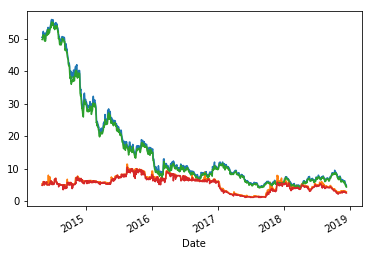

In [54]:
y_esv.High.plot()
y_srax.High.plot()
y_esv.Low.plot()
y_srax.Low.plot()
plt.show()

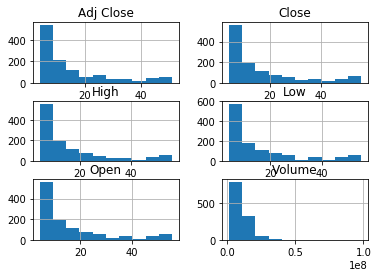

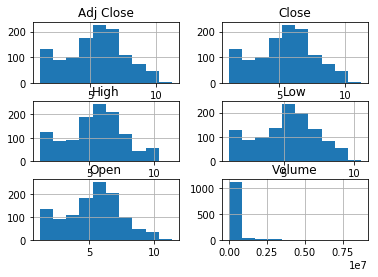

In [55]:
y_esv.hist()
y_srax.hist()
plt.show()

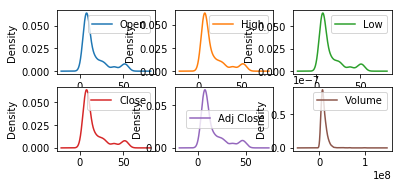

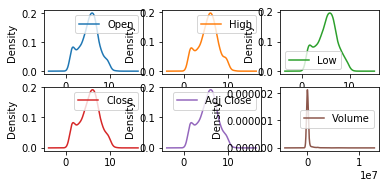

In [56]:
y_esv.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
y_srax.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()

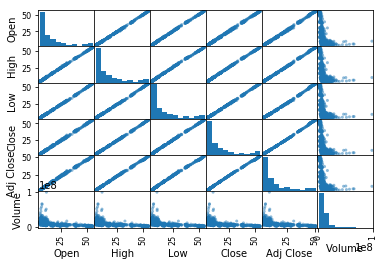

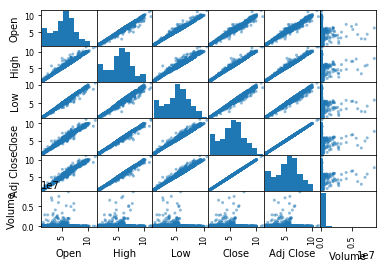

In [57]:
pd.plotting.scatter_matrix(y_esv)
pd.plotting.scatter_matrix(y_srax)
plt.show()

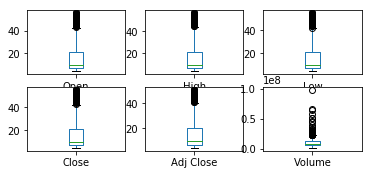

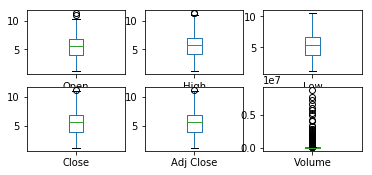

In [58]:
y_esv.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
y_srax.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

In [59]:
# Quest to remove outliers
stats.zscore(y_esv, axis=0, ddof=0)

array([[ 2.47532977,  2.44340807,  2.48910242,  2.44811294,  2.36468063,
        -1.01960171],
       [ 2.45075568,  2.44053721,  2.49421688,  2.45607433,  2.37257713,
        -1.09055523],
       [ 2.44641901,  2.47427207,  2.48910242,  2.51542289,  2.43144448,
        -0.96971297],
       ...,
       [-0.80675577, -0.82028073, -0.8089917 , -0.81388665, -0.83466886,
         0.68163718],
       [-0.80747854, -0.81884519, -0.80533851, -0.81895299, -0.84022726,
         0.42961177],
       [-0.82337942, -0.83607161, -0.83018016, -0.83704707, -0.86007869,
         1.22495216]])

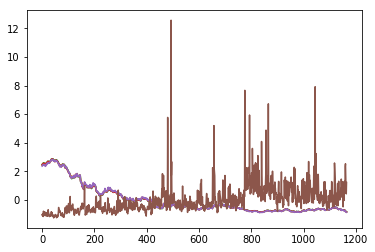

In [60]:
plt.plot(stats.zscore(y_esv, axis=0, ddof=0))
plt.show()

In [61]:
def reject_outliers(data, m = 2.):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/mdev if mdev else 0.
    return data[s<m]

def reject_outliers_2(data, m = 2.):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/(mdev if mdev else 1.)
    return data[s<m]

data_points = np.array([10, 10, 10, 17, 10, 10])
print(reject_outliers(data_points))
print(reject_outliers_2(data_points))
#[[10, 10, 10, 17, 10, 10]]  # 17 is not filtered
#[10, 10, 10, 10, 10]  # 17 is filtered (it's distance, 7, is greater than m)

[[10 10 10 17 10 10]]
[10 10 10 10 10]


In [62]:
# IT CREATED HOLES IN PLOTS, NOT SURE IF IT'S USEFUL, BUT KEEPING IT FOR NOW
#setting the number to NaN rather than removing it from the data, 
#since if you remove it you change the length which can mess up plotting 
#(i.e. if you're only removing outliers from one column in a table, 
#but you need it to remain the same as the other columns so you can plot them against each other).
#https://stackoverflow.com/questions/11686720/is-there-a-numpy-builtin-to-reject-outliers-from-a-list (Alex S. Jun 20)
#https://stackoverflow.com/users/728286/alex-s
''' THIS IS A COMMENT
def reject_outliers(data, m=2):
    stdev = np.std(data)
    mean = np.mean(data)
    maskMin = mean - stdev * m
    maskMax = mean + stdev * m
    mask = np.ma.masked_outside(data, maskMin, maskMax)
    print('Masking values outside of {} and {}'.format(maskMin, maskMax))
    return mask
print(reject_outliers(data_points))
'''

" THIS IS A COMMENT\ndef reject_outliers(data, m=2):\n    stdev = np.std(data)\n    mean = np.mean(data)\n    maskMin = mean - stdev * m\n    maskMax = mean + stdev * m\n    mask = np.ma.masked_outside(data, maskMin, maskMax)\n    print('Masking values outside of {} and {}'.format(maskMin, maskMax))\n    return mask\nprint(reject_outliers(data_points))\n"

In [63]:
esv_no=reject_outliers_2(y_esv)
srax_no=reject_outliers_2(y_srax)

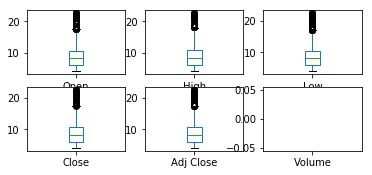

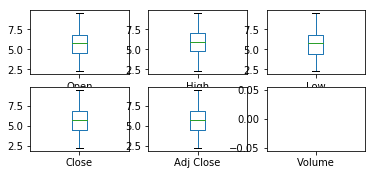

In [64]:
#let's look at boxplot again to see if outliers are removed
esv_no.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
srax_no.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

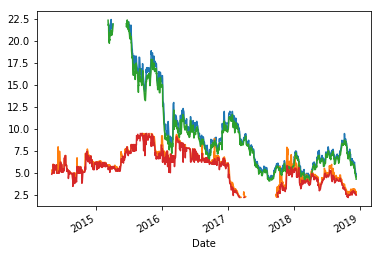

In [65]:
esv_no.High.plot()
srax_no.High.plot()
esv_no.Low.plot()
srax_no.Low.plot()
plt.show()

## Split data into test and train
### How to separate out data into test and train? What specifically to use? Open price, Close Price, High or Low?
### To predict stock price tomorrow, possibly a median price for the past few days or last week might help in trying to predict the next high/low?


In [66]:
# Convert index to column date
y_esv.reset_index(level=0, inplace=True)

In [67]:
# Example to split data into train and test
X = y_esv
train_size = int(len(X) * 0.66)
train, test = X[0:train_size], X[train_size:len(X)]
print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 1165
Training Observations: 768
Testing Observations: 397


In [68]:
# Copy of original data
train_original=train.copy()
test_original=test.copy()

In [69]:
print('Min Date: ',y_esv.Date.min())
print('Max Date: ',y_esv.Date.max())
print('Training data 10 obs')
print(train.head())
print('Test data 10 obs')
print(test.head())

Min Date:  2014-05-01 00:00:00
Max Date:  2018-12-13 00:00:00
Training data 10 obs
        Date       Open       High        Low      Close  Adj Close   Volume
0 2014-05-01  50.270000  50.369999  49.750000  49.820000  45.041172  2726900
1 2014-05-02  49.930000  50.330002  49.820000  49.930000  45.140617  2226700
2 2014-05-05  49.869999  50.799999  49.750000  50.750000  45.881966  3078600
3 2014-05-06  50.770000  51.250000  50.360001  51.150002  46.243595  2093000
4 2014-05-07  51.259998  51.529999  50.689999  51.500000  46.560017  1794100
Test data 10 obs
          Date  Open  High   Low  Close  Adj Close    Volume
768 2017-05-18  7.35  7.59  7.31   7.44   7.346632   9776300
769 2017-05-19  7.54  7.59  7.42   7.47   7.376256  12799400
770 2017-05-22  7.62  7.74  7.53   7.66   7.563871   9653800
771 2017-05-23  7.66  7.71  7.52   7.62   7.524373   6073600
772 2017-05-24  7.59  7.72  7.46   7.51   7.415754   5157300


In [70]:
# Creating new features
for i in (train, test):
    i['year']=i.Date.dt.year 
    i['month']=i.Date.dt.month 
    i['day']=i.Date.dt.day
    i['Hour']=i.Date.dt.hour 
    i['dayofweek']=i.Date.dt.dayofweek

In [71]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day,Hour,dayofweek
0,2014-05-01,50.270000,50.369999,49.750000,49.820000,45.041172,2726900,2014,5,1,0,3
1,2014-05-02,49.930000,50.330002,49.820000,49.930000,45.140617,2226700,2014,5,2,0,4
2,2014-05-05,49.869999,50.799999,49.750000,50.750000,45.881966,3078600,2014,5,5,0,0
3,2014-05-06,50.770000,51.250000,50.360001,51.150002,46.243595,2093000,2014,5,6,0,1
4,2014-05-07,51.259998,51.529999,50.689999,51.500000,46.560017,1794100,2014,5,7,0,2


In [72]:
train.index = train['Date'] # indexing the Datetime to get the time period on the x-axis.      
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day,Hour,dayofweek
Date,,,,,,,,,,,,
2014-05-01,2014-05-01,50.270000,50.369999,49.750000,49.820000,45.041172,2726900,2014,5,1,0,3
2014-05-02,2014-05-02,49.930000,50.330002,49.820000,49.930000,45.140617,2226700,2014,5,2,0,4
2014-05-05,2014-05-05,49.869999,50.799999,49.750000,50.750000,45.881966,3078600,2014,5,5,0,0
2014-05-06,2014-05-06,50.770000,51.250000,50.360001,51.150002,46.243595,2093000,2014,5,6,0,1
2014-05-07,2014-05-07,51.259998,51.529999,50.689999,51.500000,46.560017,1794100,2014,5,7,0,2


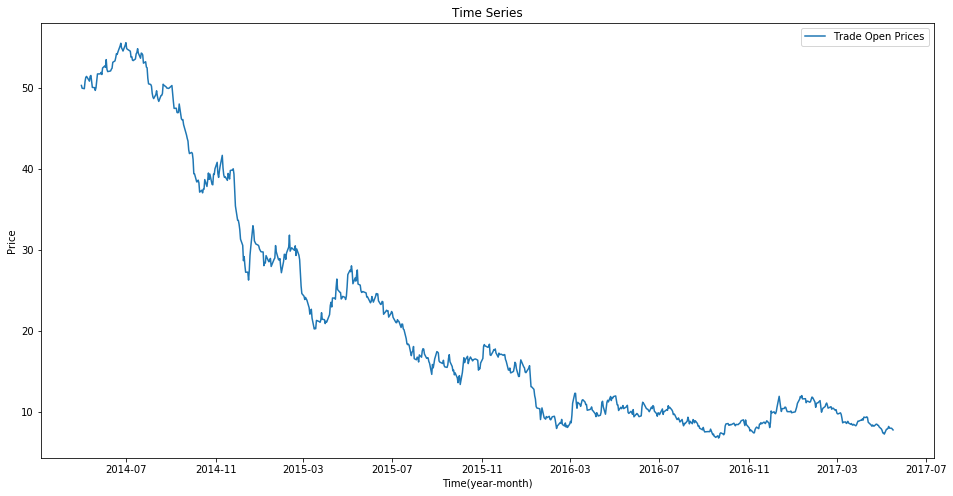

In [73]:
ts = train['Open']
plt.figure(figsize=(16,8))
plt.plot(ts, label='Trade Open Prices')
plt.title('Time Series')
plt.xlabel("Time(year-month)")
plt.ylabel("Price")
plt.legend(loc='best')

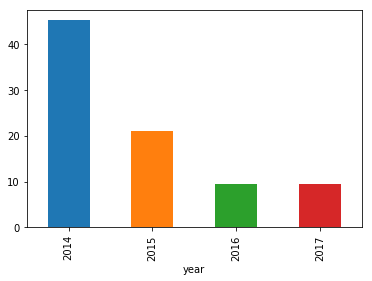

In [74]:
# Year wise count
train.groupby('year')['Open'].mean().plot.bar()

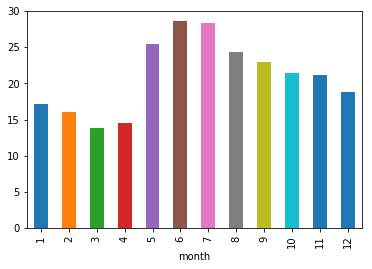

In [75]:
# Month wise count
train.groupby('month')['Open'].mean().plot.bar()

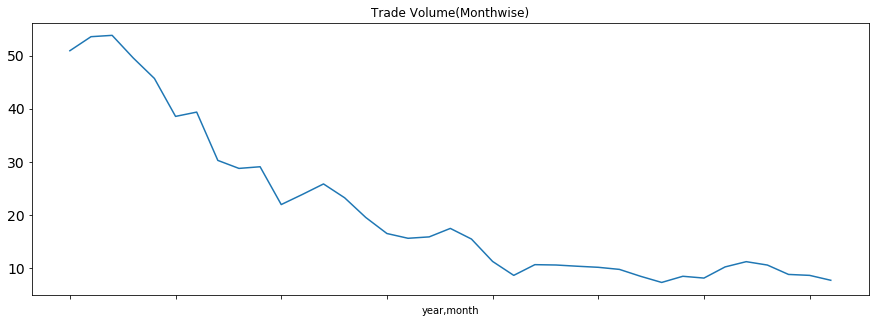

In [76]:
temp=train.groupby(['year', 'month'])['Open'].mean()
temp.plot(figsize=(15,5), title= 'Trade Volume(Monthwise)', fontsize=14)

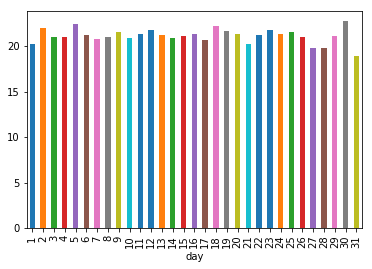

In [77]:
# daywise count
train.groupby('day')['Open'].mean().plot.bar()

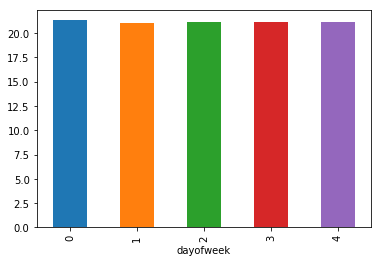

In [78]:
train.groupby('dayofweek')['Open'].mean().plot.bar()

## Start Building Model

In [79]:
Train_size = int(len(train) * 0.66)
Train, valid = train[0:Train_size], train[Train_size:len(train)]
print('Observations: %d' % (len(train)))
print('Training Observations: %d' % (len(Train)))
print('Validation Observations: %d' % (len(valid)))

Observations: 768
Training Observations: 506
Validation Observations: 262


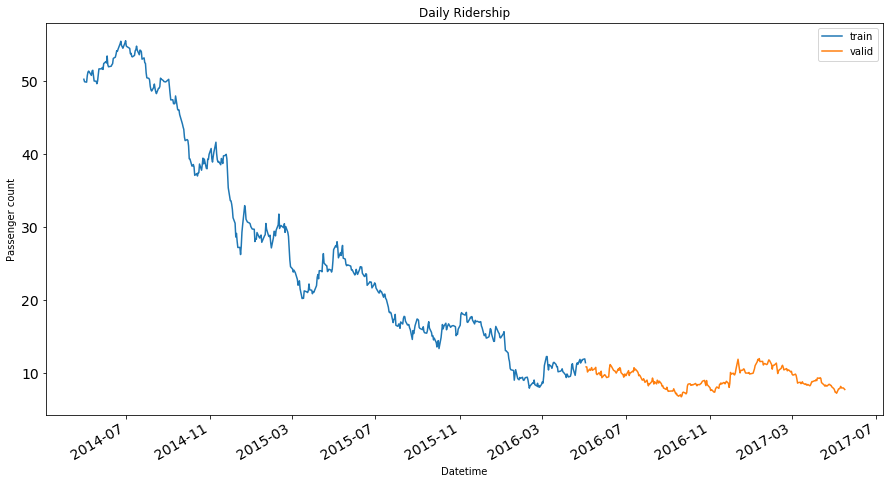

In [80]:
# Checking the train and validation split
Train.Open.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train')
valid.Open.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='valid')
plt.xlabel("Datetime")
plt.ylabel("Passenger count")
plt.legend(loc='best')
plt.show()

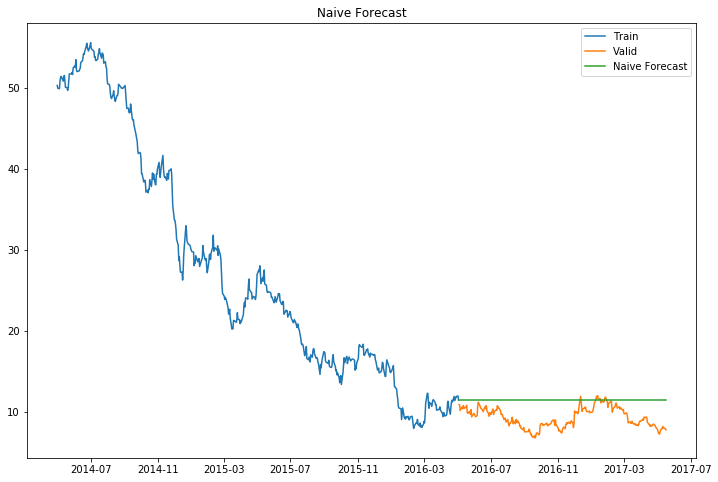

In [81]:
# Naive Approach
dd= np.asarray(Train.Open)
y_hat = valid.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(Train.index, Train['Open'], label='Train')
plt.plot(valid.index,valid['Open'], label='Valid')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [82]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(valid.Open, y_hat.naive))
print(rms)

2.488055971855129


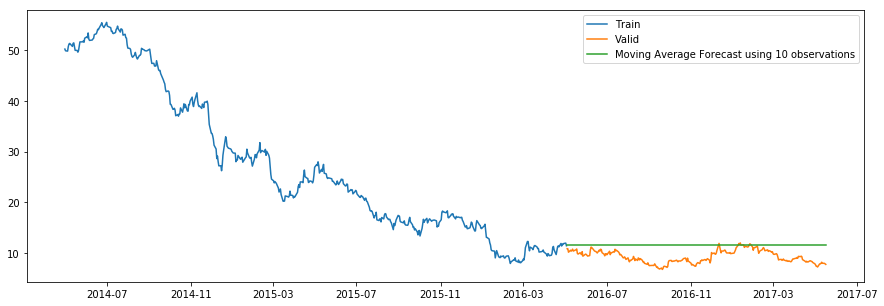

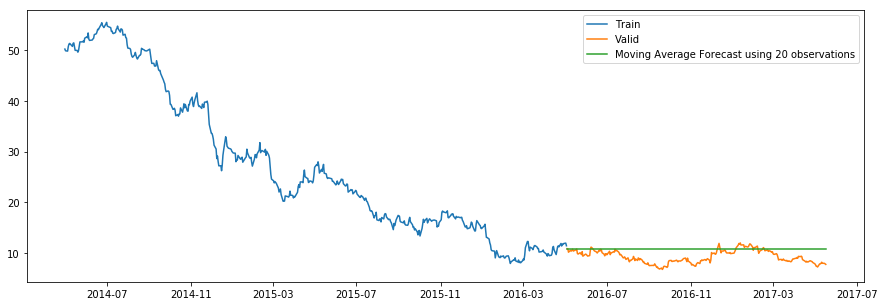

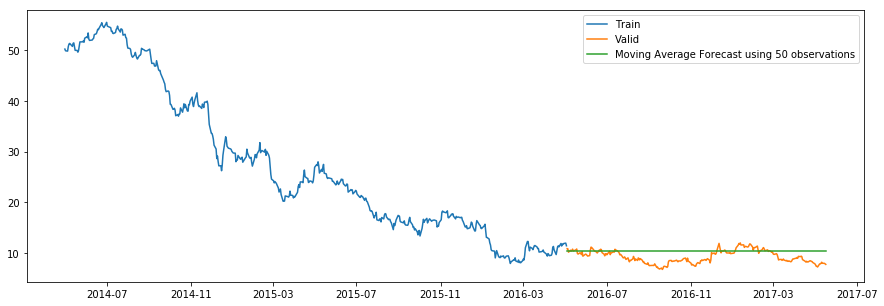

In [83]:
# Moving Average
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Open'].rolling(10).mean().iloc[-1] # average of last 10 observations.
plt.figure(figsize=(15,5)) 
plt.plot(Train['Open'], label='Train')
plt.plot(valid['Open'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 10 observations')
plt.legend(loc='best')
plt.show()

y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Open'].rolling(20).mean().iloc[-1] # average of last 20 observations.
plt.figure(figsize=(15,5))
plt.plot(Train['Open'], label='Train')
plt.plot(valid['Open'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 20 observations')
plt.legend(loc='best')
plt.show()

y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Open'].rolling(50).mean().iloc[-1] # average of last 50 observations.
plt.figure(figsize=(15,5))
plt.plot(Train['Open'], label='Train')
plt.plot(valid['Open'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 50 observations')
plt.legend(loc='best')
plt.show()

In [84]:
rms = sqrt(mean_squared_error(valid.Open, y_hat_avg.moving_avg_forecast))
print(rms)

1.7233119463484878


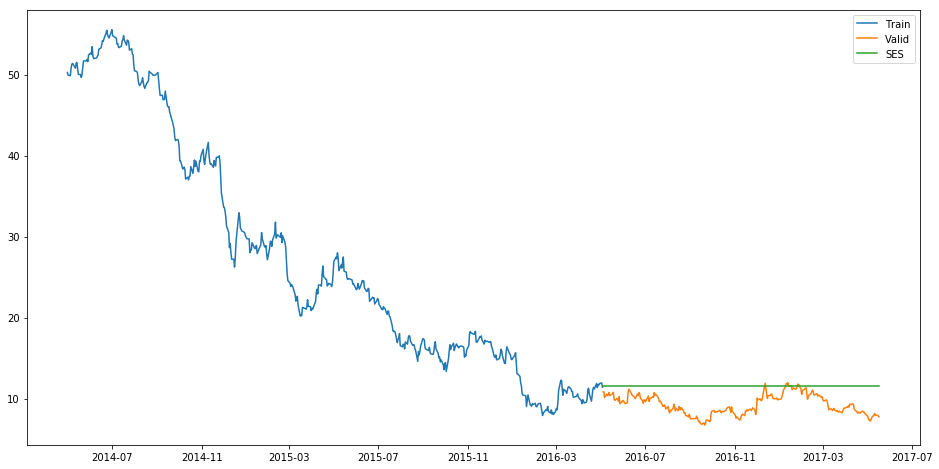

In [85]:
# Simple exponential smoothing
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = valid.copy()
fit2 = SimpleExpSmoothing(np.asarray(Train['Open'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot(Train['Open'], label='Train')
plt.plot(valid['Open'], label='Valid')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [86]:
rms = sqrt(mean_squared_error(valid.Open, y_hat_avg.SES))
print(rms)

2.647686743145359


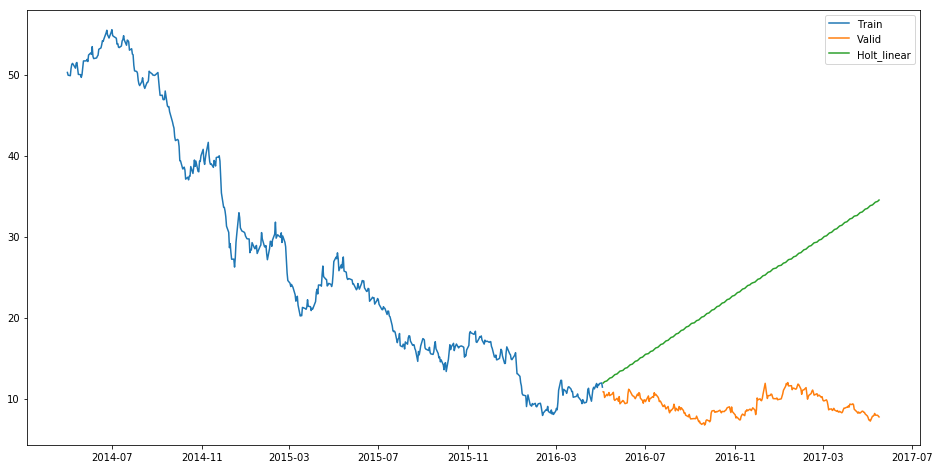

In [87]:
# Holt's Linear trend model
y_hat_avg = valid.copy()

fit1 = Holt(np.asarray(Train['Open'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(valid))

plt.figure(figsize=(16,8))
plt.plot(Train['Open'], label='Train')
plt.plot(valid['Open'], label='Valid')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [88]:
rms = sqrt(mean_squared_error(valid.Open, y_hat_avg.Holt_linear))
print(rms)

15.536221234322491


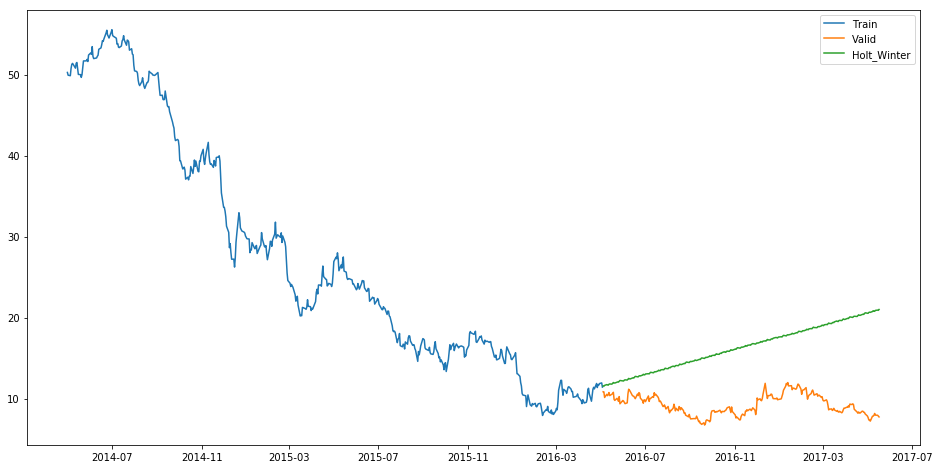

In [89]:
# Holt winter's model on daily time series
y_hat_avg = valid.copy()
fit1 = ExponentialSmoothing(np.asarray(Train['Open']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot( Train['Open'], label='Train')
plt.plot(valid['Open'], label='Valid')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [90]:
rms = sqrt(mean_squared_error(valid.Open, y_hat_avg.Holt_Winter))
print(rms)

7.680694539851116


In [91]:
# Dickey Fuller test for stationarity
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    #rolmean = pd.rolling_mean(timeseries, window=24) # 24 hours on each day
    rolmean = timeseries.rolling(24).mean()
    #rolstd = pd.rolling_std(timeseries, window=24)
    rolstd = timeseries.rolling(24).std()
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [92]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

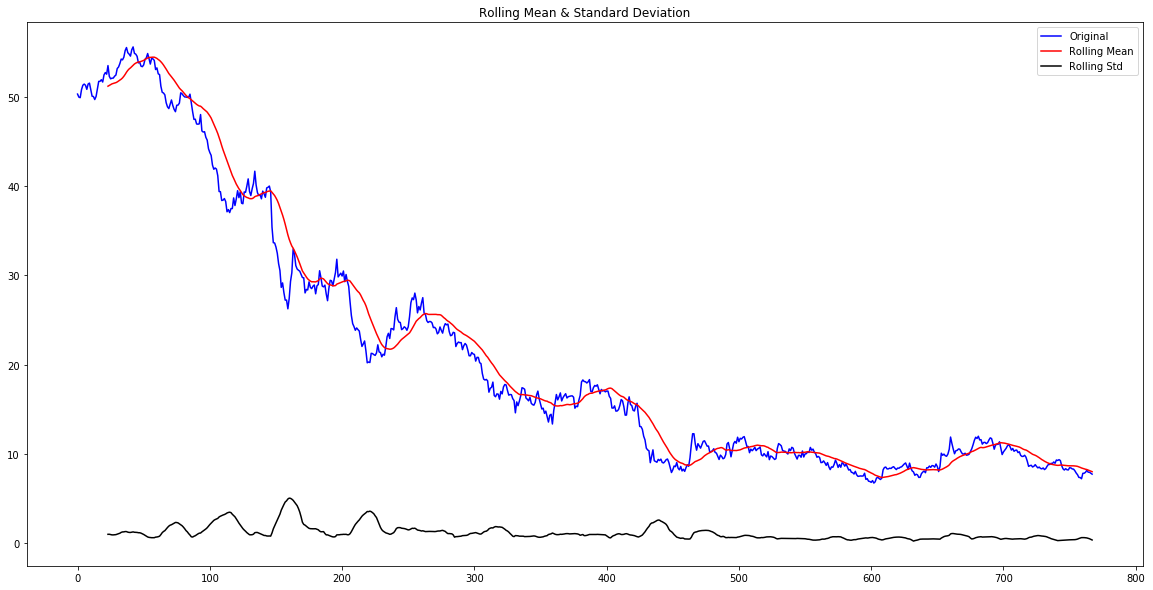

Results of Dickey-Fuller Test:
Test Statistic                  -1.859171
p-value                          0.351505
#Lags Used                       1.000000
Number of Observations Used    766.000000
Critical Value (1%)             -3.438916
Critical Value (5%)             -2.865321
Critical Value (10%)            -2.568783
dtype: float64


In [93]:
test_stationarity(train_original['Open'])

In [94]:
Train_log = np.log(Train['Open'])
valid_log = np.log(valid['Open'])

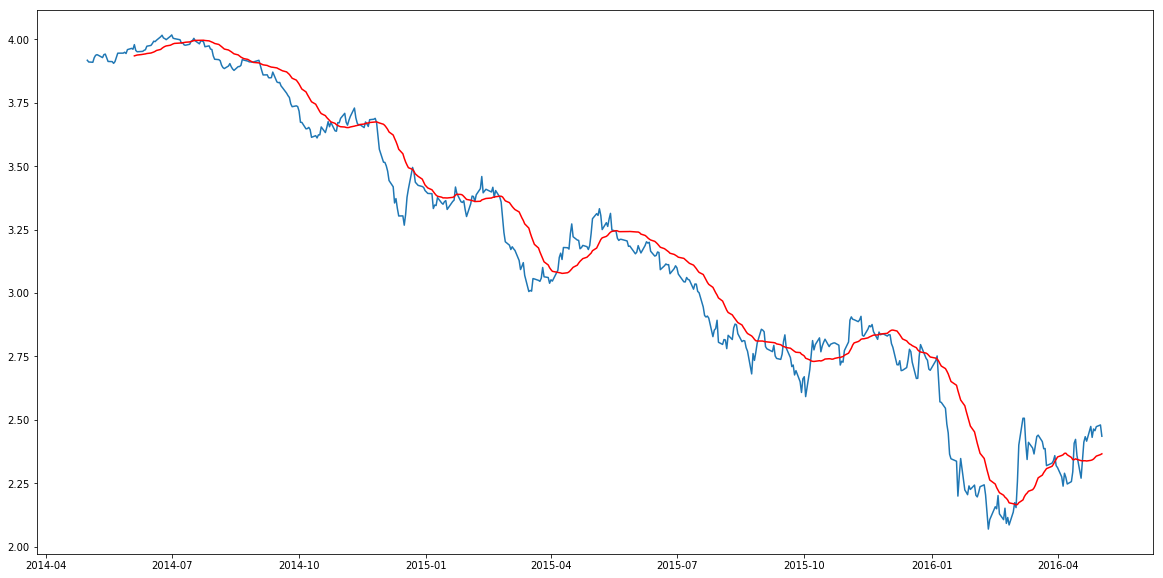

In [95]:
# Taking rolling mean
moving_avg = Train_log.rolling(24).mean()
plt.plot(Train_log)
plt.plot(moving_avg, color = 'red')
plt.show()

In [96]:
# Removing trend
train_log_moving_avg_diff = Train_log - moving_avg

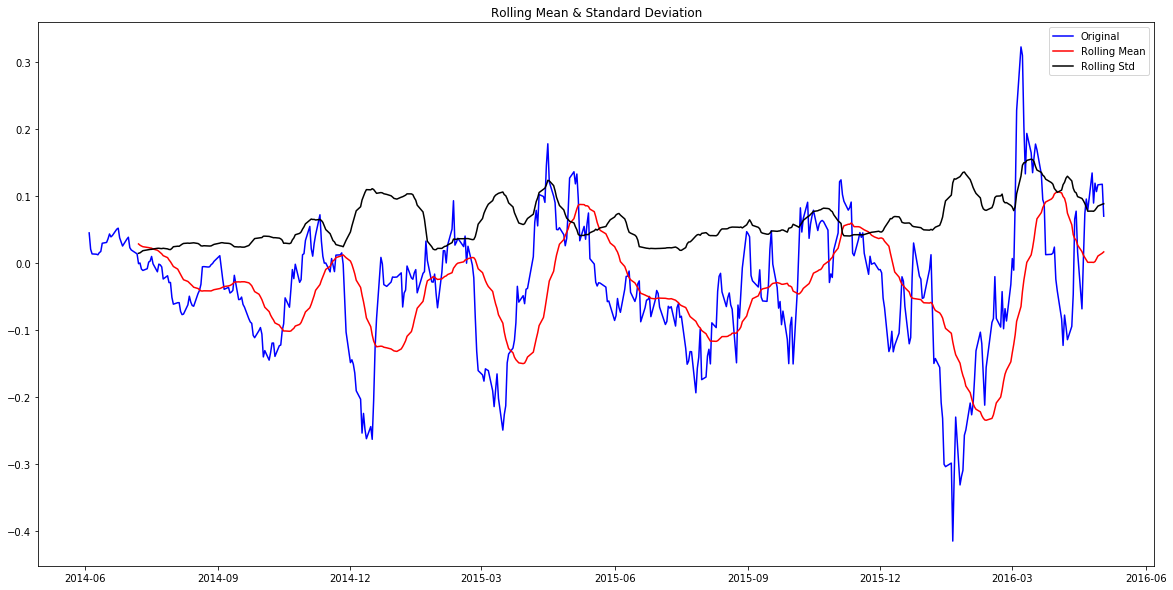

Results of Dickey-Fuller Test:
Test Statistic                  -5.104261
p-value                          0.000014
#Lags Used                      12.000000
Number of Observations Used    470.000000
Critical Value (1%)             -3.444340
Critical Value (5%)             -2.867709
Critical Value (10%)            -2.570056
dtype: float64


In [97]:
train_log_moving_avg_diff.dropna(inplace = True)
test_stationarity(train_log_moving_avg_diff)

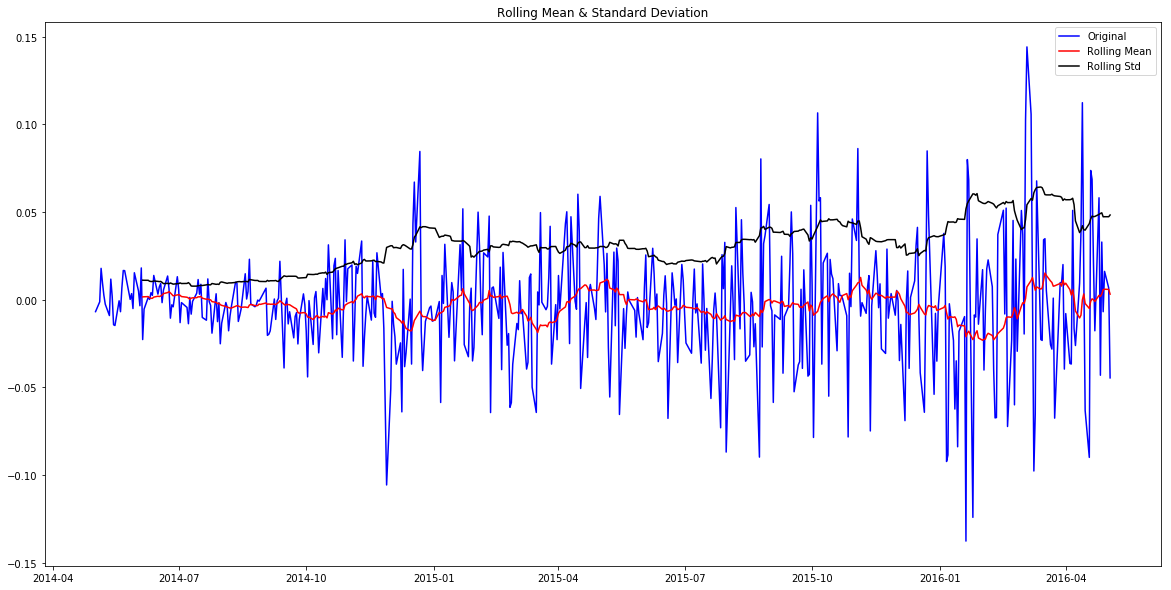

Results of Dickey-Fuller Test:
Test Statistic                -1.644981e+01
p-value                        2.384254e-29
#Lags Used                     1.000000e+00
Number of Observations Used    5.030000e+02
Critical Value (1%)           -3.443418e+00
Critical Value (5%)           -2.867303e+00
Critical Value (10%)          -2.569840e+00
dtype: float64


In [98]:
train_log_diff = Train_log - Train_log.shift(1)
test_stationarity(train_log_diff.dropna())

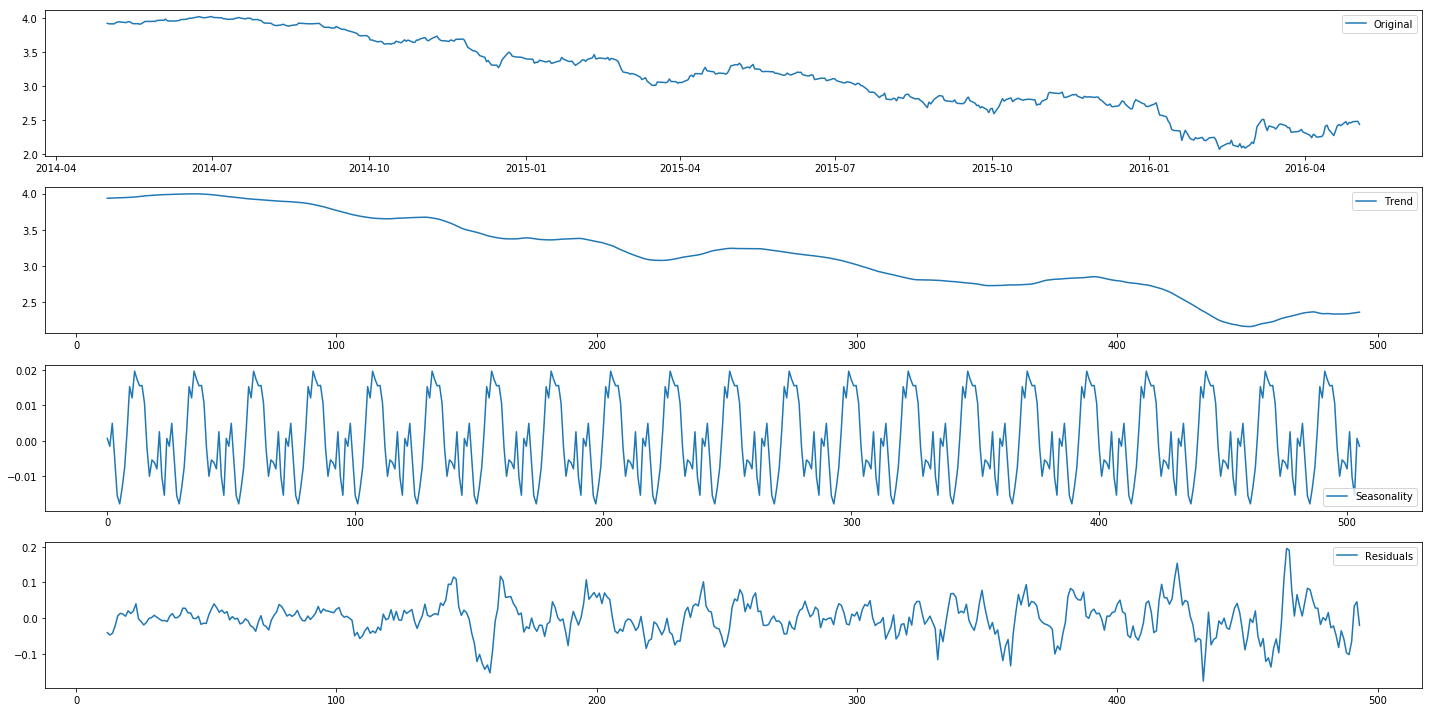

In [99]:
# Decomposing the time series into trend, seasonality and residual
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(pd.DataFrame(Train_log).Open.values, freq = 24)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(Train_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

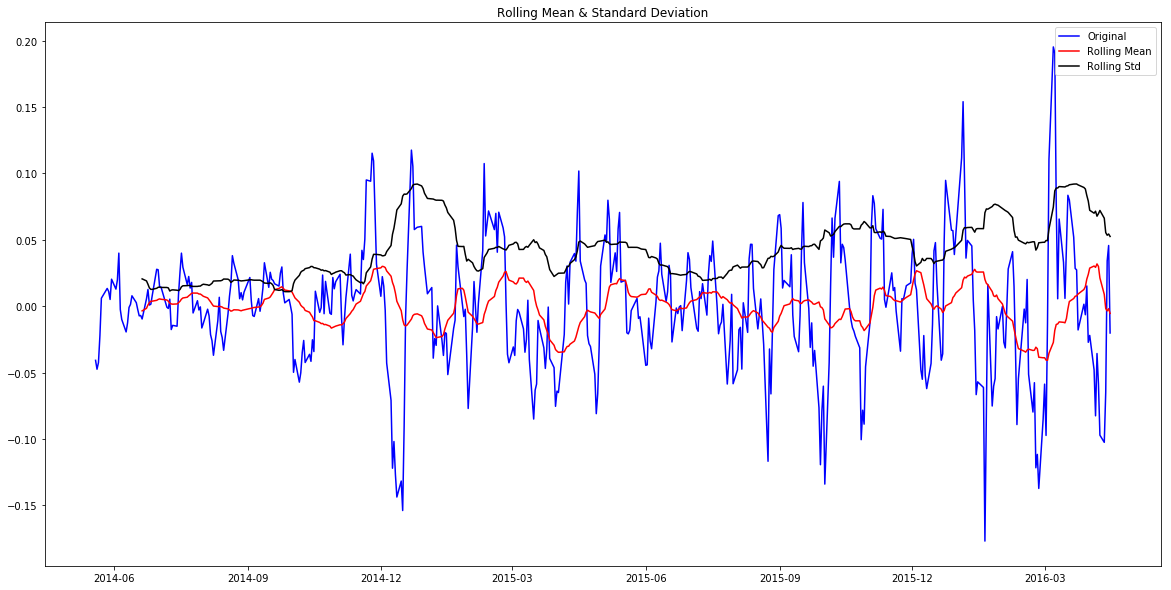

Results of Dickey-Fuller Test:
Test Statistic                -7.497864e+00
p-value                        4.331409e-11
#Lags Used                     1.200000e+01
Number of Observations Used    4.690000e+02
Critical Value (1%)           -3.444370e+00
Critical Value (5%)           -2.867722e+00
Critical Value (10%)          -2.570063e+00
dtype: float64


In [100]:
train_log_decompose = pd.DataFrame(residual)
train_log_decompose['date'] = Train_log.index
train_log_decompose.set_index('date', inplace = True)
train_log_decompose.dropna(inplace=True)
test_stationarity(train_log_decompose[0])

## ACF (Auto Corelation Function) and PACF (Partial Auto Corelation Function)plot

In [101]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(train_log_diff.dropna(), nlags=25)
lag_pacf = pacf(train_log_diff.dropna(), nlags=25, method='ols')

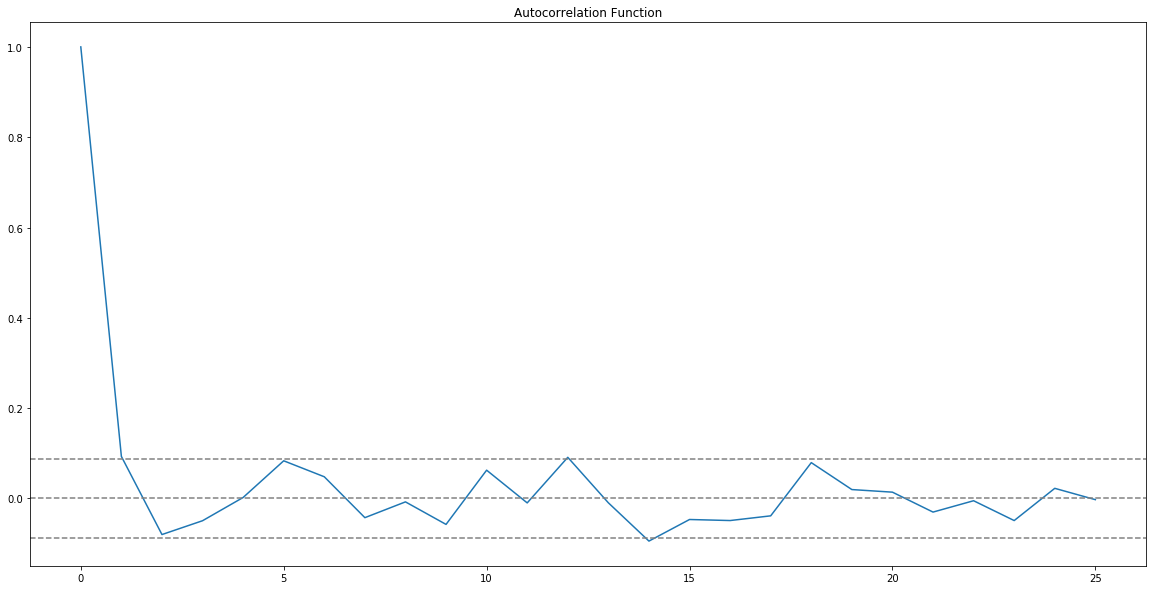

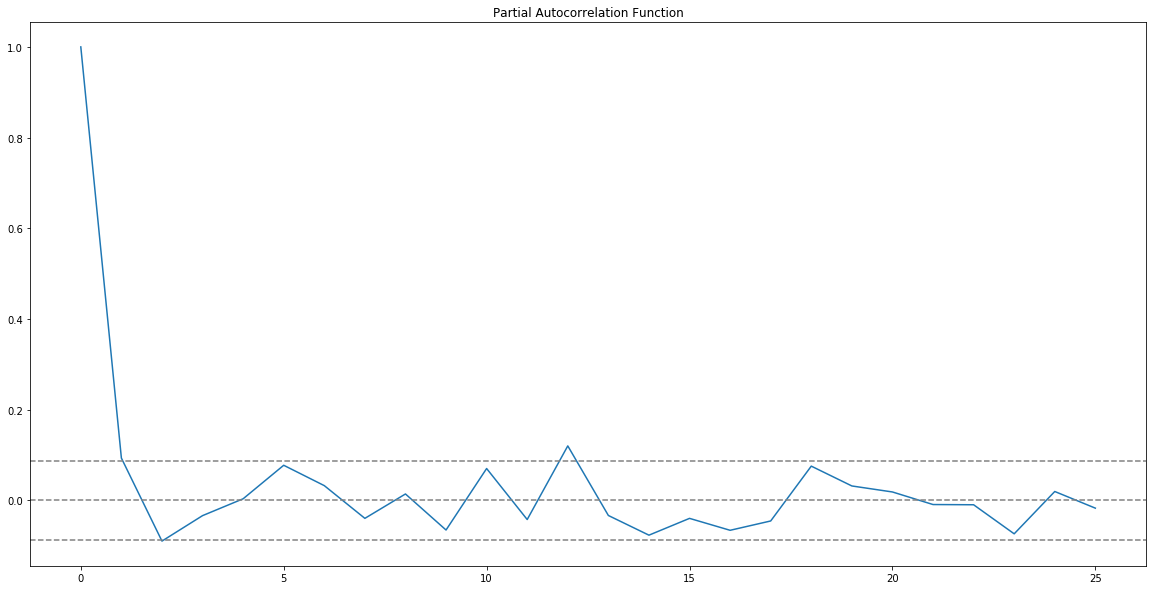

In [102]:
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.show()


In [103]:
from statsmodels.tsa.arima_model import ARIMA

In [104]:
train.index = pd.DatetimeIndex(train.index.values,
                               freq=train.index.inferred_freq)
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day,Hour,dayofweek
2014-05-01,2014-05-01,50.270000,50.369999,49.750000,49.820000,45.041172,2726900,2014,5,1,0,3
2014-05-02,2014-05-02,49.930000,50.330002,49.820000,49.930000,45.140617,2226700,2014,5,2,0,4
2014-05-05,2014-05-05,49.869999,50.799999,49.750000,50.750000,45.881966,3078600,2014,5,5,0,0
2014-05-06,2014-05-06,50.770000,51.250000,50.360001,51.150002,46.243595,2093000,2014,5,6,0,1
2014-05-07,2014-05-07,51.259998,51.529999,50.689999,51.500000,46.560017,1794100,2014,5,7,0,2


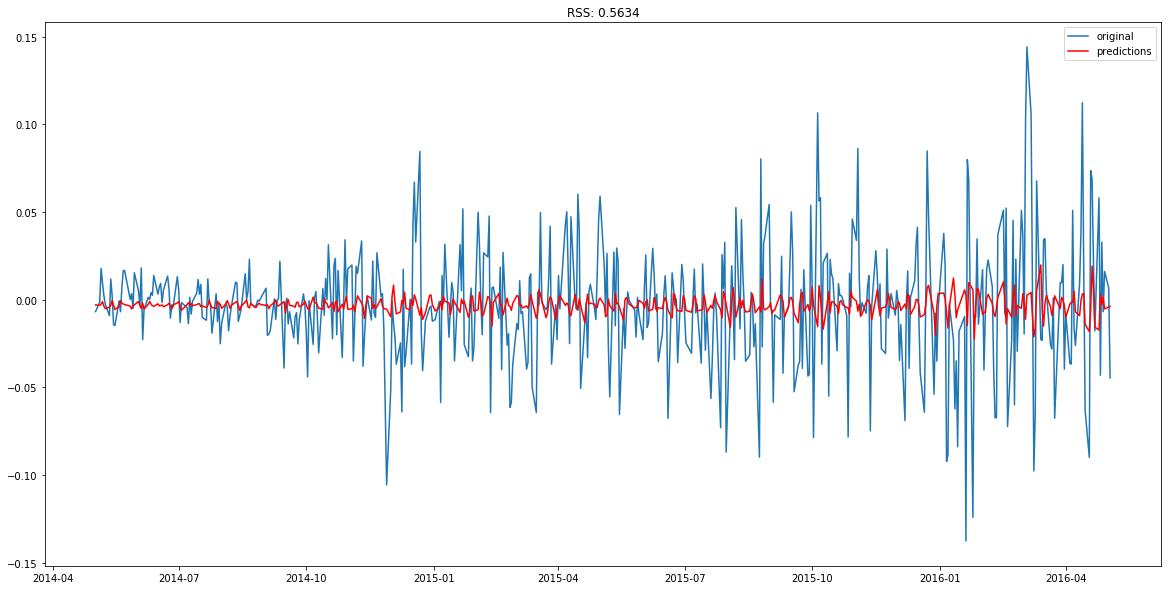

Printing AR Model


In [114]:
# AR model
model = ARIMA(Train_log, order=(2, 1, 2))  # here the q value is zero since it is just the AR model
results_AR = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(), label='original')
plt.plot(results_AR.fittedvalues, color='red', label='predictions')
plt.legend(loc='best')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-train_log_diff.dropna())**2))
plt.show()
print('Printing AR Model')

In [106]:
# predictions using AR model
AR_predict=results_AR.predict(start="2014-08-25", end="2014-11-25")
AR_predict=AR_predict.cumsum().shift().fillna(0)
AR_predict1=pd.Series(np.ones(valid.shape[0]) * np.log(valid['Open'])[0], index = valid.index)
AR_predict1=AR_predict1.add(AR_predict,fill_value=0)
AR_predict = np.exp(AR_predict1)

KeyError: "invalid literal for int() with base 10: '2014-08-25'"

In [ ]:
AR_predict=results_AR.predict(start="2014-08-25", end="2014-11-25")

In [ ]:
# MA model
model = ARIMA(Train_log, order=(0, 1, 2))  # here the p value is zero since it is just the MA model
results_MA = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(), label='original')
plt.plot(results_MA.fittedvalues, color='red', label='prediction')
plt.legend(loc='best')
plt.show()

In [ ]:
# predictions using MA model
MA_predict=results_MA.predict(start="2014-06-25", end="2014-09-25")
MA_predict=MA_predict.cumsum().shift().fillna(0)
MA_predict1=pd.Series(np.ones(valid.shape[0]) * np.log(valid['Open'])[0], index = valid.index)
MA_predict1=MA_predict1.add(MA_predict,fill_value=0)
MA_predict = np.exp(MA_predict1)

In [ ]:
# validating the MA model
plt.plot(valid['Open'], label = "Valid")
plt.plot(MA_predict, color = 'red', label = "Predict")
plt.legend(loc= 'best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(MA_predict, valid['Count']))/valid.shape[0]))
plt.show()